In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Gradient descent

In [2]:
def f(x, y):
  return (x - 2)**2 + (y - 1)**2

In [3]:
def f1(x, y):
  return 10*(x - 2)**2 + (y - 1)**2

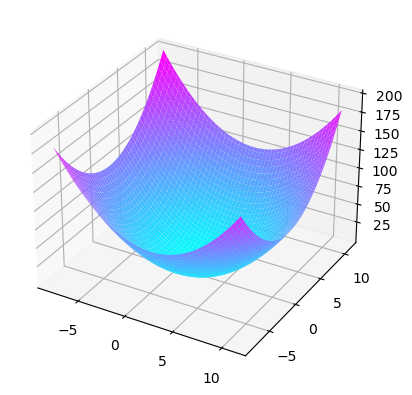

In [4]:
# fig, ax = plt.subplots()

fig = plt.figure()
ax = plt.axes(projection='3d')

d = 10

X = np.linspace(2-d, 1+d, 100)
Y = np.linspace(2-d, 1+d, 100)

X, Y = np.meshgrid(X, Y)
Z = f(X, Y)

ax.plot_surface(X, Y, Z, cmap='cool')
plt.show()

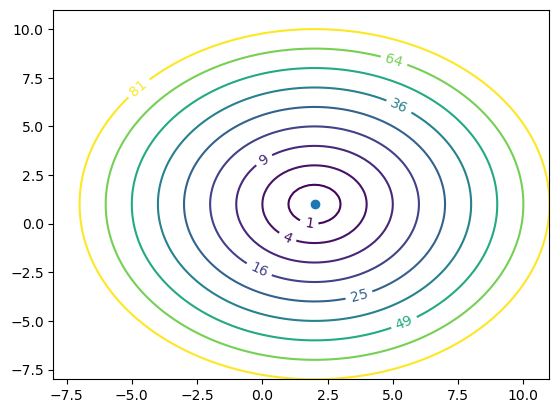

In [5]:
fig, ax = plt.subplots()

q = ax.contour(X, Y, Z, levels=np.arange(10)**2)
ax.clabel(q, inline=True, fontsize=10)

ax.scatter(2, 1)

plt.show()

In [6]:
def f_grad(x):
  return np.array([[2*(x[0, 0]-2)], [2*(x[1, 0]-1)]])

In [7]:
def f1_grad(x):
  return np.array([[10*2*(x[0, 0]-2)], [2*(x[1, 0]-1)]])

In [8]:
N = 25
alpha = 0.1

x_0 = np.random.uniform(-10, 10, (1, 2))[0].reshape(-1, 1)
x_0

array([[ 6.23461782],
       [-6.56951351]])

In [9]:
alpha = 0.05

In [10]:
x = x_0
arguments = [x_0]
values = [f(x_0[0, 0], x_0[1, 0])]

for i in range(N):
  x = x - alpha * f_grad(x) # * np.random.normal(0, 1, (2, 1))
  arguments.append(x)

  values.append(f(x[0, 0], x[1, 0]))

In [11]:
arguments = np.array(arguments)
arguments.shape

arguments = arguments.reshape((arguments.shape[0], 2))

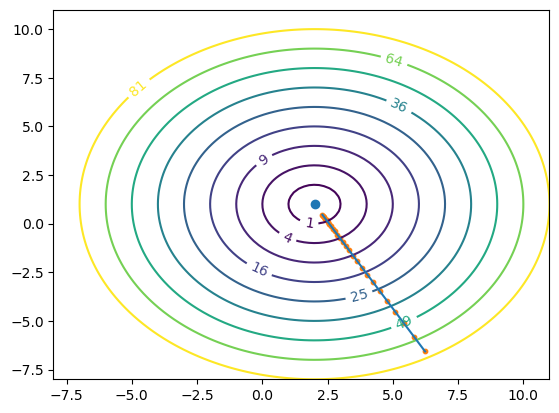

In [12]:
fig, ax = plt.subplots()

q = ax.contour(X, Y, Z, levels=np.arange(10)**2)
ax.clabel(q, inline=True, fontsize=10)

ax.scatter(2, 1)

ax.plot(arguments[:,0], arguments[:,1])
ax.scatter(arguments[:,0], arguments[:,1], s=10)

plt.show()

## Regression

In [282]:
N = 50
p = 2

X = np.random.uniform(-2, 2, (50, 2))
X[:, 1] *= 10

In [283]:
beta = np.array([1, 50])

In [284]:
eps = np.random.normal(0, 0.5, 50)
eps.max()

1.3500935394048221

In [285]:
y = X @ beta + eps

In [286]:
def mse(X, y, beta):
  return np.linalg.norm(y[:, None] - X @ beta, axis=0) ** 2 / (2*y.shape[0])

In [287]:
B = np.array([beta, beta * 2]).T

In [288]:
mse(X, y, B)

array([1.12696083e-01, 1.57914542e+05])

In [289]:
def grad_mse(X, y, beta):
  return X.T @ (X @ beta - y)/(2*y.shape[0])

In [290]:
grad_mse(X, y, beta)

array([0.09952099, 0.07713083])

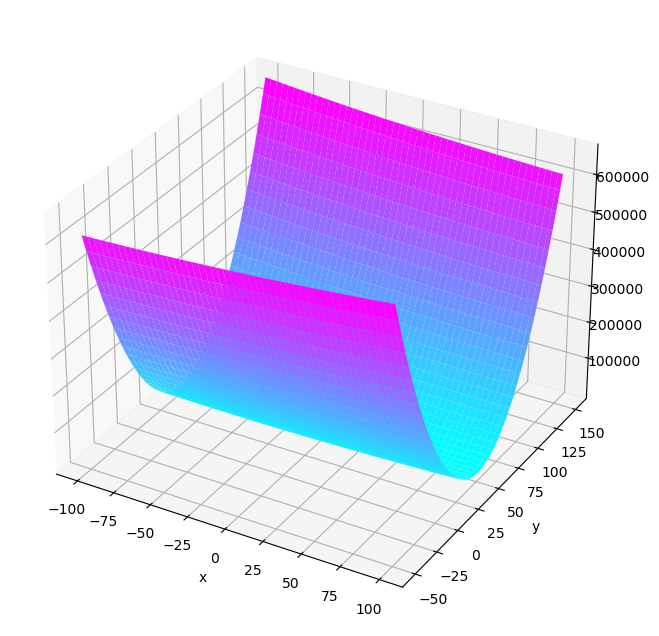

In [291]:
# fig, ax = plt.subplots()

fig = plt.figure(figsize=(8, 8))
ax = plt.axes(projection='3d')

grid_x = np.linspace(-100, 100, 200)
grid_y = np.linspace(-50, 150, 200)

grid_x, grid_y = np.meshgrid(grid_x, grid_y)
Z = mse(X, y, np.array([grid_x.flatten(), grid_y.flatten()])).reshape(grid_x.shape)

ax.plot_surface(grid_x, grid_y, Z, cmap='cool')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

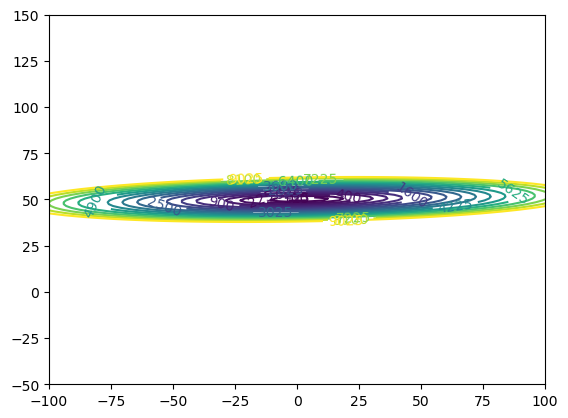

In [292]:
fig, ax = plt.subplots()

q = ax.contour(grid_x, grid_y, Z, levels=np.arange(0, 100, 5)**2)
ax.clabel(q, inline=True, fontsize=10)

plt.show()

In [343]:
alpha = 0.01
N_steps = 1000

In [344]:
beta0 = np.random.normal(0, 15, 2)

betas = [beta0]

for i in range(N_steps):
    b_cur = betas[-1]
    b_next = b_cur - alpha * grad_mse(X, y, b_cur)
    betas.append(b_next)

betas = np.array(betas)

In [345]:
mse_history = mse(X, y, betas.T)

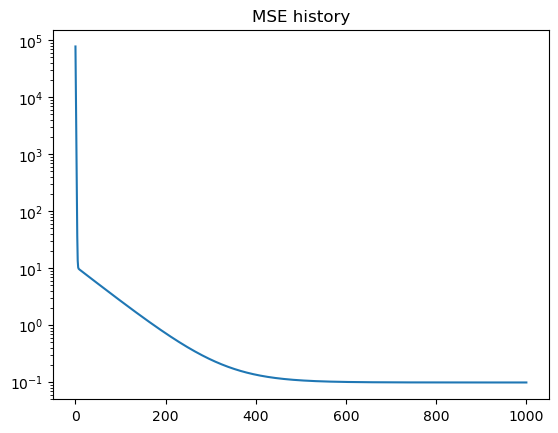

In [346]:
plt.plot(np.arange(N_steps + 1), mse_history)
plt.yscale("log")
plt.title("MSE history")
plt.show()

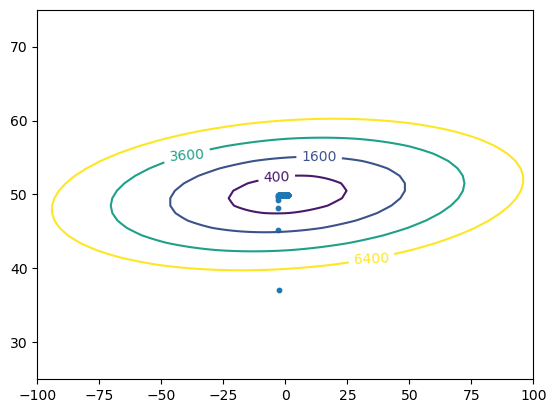

In [347]:
fig, ax = plt.subplots()

q = ax.contour(grid_x, grid_y, Z, levels=np.arange(0, 100, 20)**2)
ax.clabel(q, inline=True, fontsize=10)

ax.scatter(*betas[0], color='red')
ax.scatter(*betas.T, s=10)

plt.ylim([25, 75])
plt.show()

In [348]:
betas[-1]

array([ 0.85389904, 49.99568518])

In [362]:
def f(x, y, a=1, b=0):
  return a * (x - 2) ** 2 + (y - 1) ** 2 + b * x * y

In [363]:
def f_grad(x, y, a=1, b=0):
    return np.array([2 * a * (x - 2) + b * y, 2 * (y - 1) + b * x])

In [364]:
def f_hes(a=1, b=0):
    return np.array([
        [2 * a, b],
        [b, 2]
    ])

def f_hes_inv(a=1, b=0):
    return np.linalg.inv(f_hes(a, b))

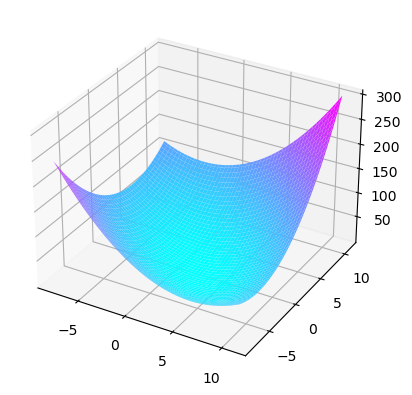

In [373]:
fig = plt.figure()
ax = plt.axes(projection='3d')

d = 10

X = np.linspace(2-d, 1+d, 100)
Y = np.linspace(2-d, 1+d, 100)

X, Y = np.meshgrid(X, Y)
Z = f(X, Y, b=1)

ax.plot_surface(X, Y, Z, cmap='cool')
plt.show()

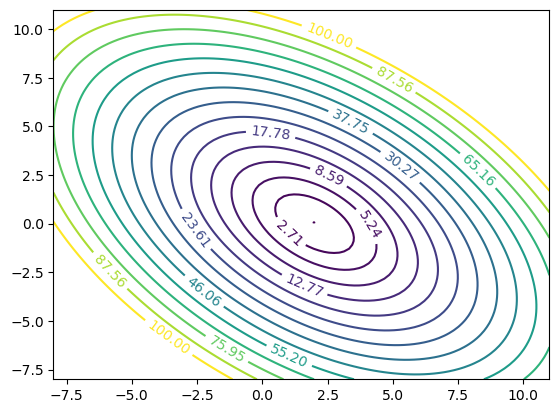

In [380]:
fig, ax = plt.subplots()

q = ax.contour(X, Y, Z, levels=np.linspace(Z.min(), 10, 15)**2)
ax.clabel(q, inline=True, fontsize=10)

plt.show()

In [381]:
N = 50
alpha = 1

In [ ]:
a, b = 5, 1 

x0 = np.random.uniform(-10, 10, 2)
x_history = [x0]

hesinv = f_hes_inv(a, b)
for i in range(N):
    x = x_history[-1]
